Introdução
===
---

In [5]:
import pandas as pd
import random
sprint = lambda x: print(x, end="\n\n\n\n")
def diminui(x):
    return x - 5

valores = pd.Series([1,3,5,7,9])
sprint(valores)

precos_frutas = pd.Series([4.99,2.99,11.99,14.00], index=['maçã','laranja','morango','uva'])
sprint(precos_frutas)

rand = random.sample(range(100),10) # Seleciona 10 numeros de 0 a 99
valores = pd.Series(rand)

sprint(valores)
sprint(valores.size)
sprint(valores[3])
sprint(precos_frutas['laranja'])
sprint(valores[3:])
sprint(valores[:3])
sprint(valores[3:8])
sprint(valores[valores > 50])
sprint(diminui(valores))
sprint(pow(valores,2))

valores = pd.Series(random.sample(range(-1000,1001),500)) # Seleciona 500 numeros de -1000 a 1000
sprint(min(valores))
sprint(max(valores))
sprint(valores[valores > 0])
sprint(valores[valores%2 == 1]) # Filtra valores impares
sprint(valores[500<valores][valores<700]) # Filtra valores no intervalo (500,700)

0    1
1    3
2    5
3    7
4    9
dtype: int64



maçã        4.99
laranja     2.99
morango    11.99
uva        14.00
dtype: float64



0    38
1    41
2    88
3    54
4     3
5    31
6    28
7    42
8     6
9    48
dtype: int64



10



54



2.99



3    54
4     3
5    31
6    28
7    42
8     6
9    48
dtype: int64



0    38
1    41
2    88
dtype: int64



3    54
4     3
5    31
6    28
7    42
dtype: int64



2    88
3    54
dtype: int64



0    33
1    36
2    83
3    49
4    -2
5    26
6    23
7    37
8     1
9    43
dtype: int64



0    1444
1    1681
2    7744
3    2916
4       9
5     961
6     784
7    1764
8      36
9    2304
dtype: int64



-993



997



0      375
6      660
9      747
10     849
11     663
14     154
15     534
16      66
18      97
21     777
24     474
25     397
26     362
29     838
30     587
35     141
38     195
39      68
40     912
43     933
44     246
47      69
48      41
49     341
52     619
53     272
56      39
57     332
60      73
6

Estatística Descritiva
===
---
### Lista de operações:
- moda
- média
- mediana
- desvio padrão

---

### Distribuição Normal
![Imagem da Distribuição Normal](distNormal.png)
~~~
from scipy.stats import normaltest
statistic, p_value = normaltest(data)
if p_value < 1e-3: # hipotese nula: data vem de dist. normal
    print("hip. nula pode ser rejeitada")
else:
    print("hip. nula não pode ser rejeitada")

~~~


In [10]:
import pandas as pd
import random
from scipy.stats import percentileofscore as p_o_s
sprint = lambda x: print(x, end="\n\n\n\n")
data = {
    "homens" : pd.read_csv("aula2/altura_homens.csv", index_col=False, header=None, squeeze=True),
    "mulheres":pd.read_csv("aula2/altura_mulheres.csv", index_col=False, header=None, squeeze=True)
}
sprint(data["homens"].min()) # menor valor
sprint(data["homens"].max()) # maior valor
sprint(data["homens"].mean()) # media
sprint(data["homens"].median()) # mediana
sprint(data["homens"].mode()) # moda
sprint(data["homens"].std()) # desvio padrao
sprint(data["homens"].quantile(.25)) # 25o percentil, 1o quartil
sprint(data["homens"].quantile(.50)) # 50o percentil, 2o quartil
sprint(data["homens"].quantile(.75)) # 75o percentil, 3o quartil
sprint(data["homens"].quantile(.95)) # 95o percentil
sprint(data["homens"].value_counts()) # tabela de frequencias
sprint(p_o_s(data["homens"],185.0)) # percentil do valor 185
sprint(abs(185.0-data["homens"].mean())/data["homens"].std()) # distancia em desvios padroes entre 185 e a media
sprint(data["homens"].describe()) # Apresenta dados estatisticos gerais
sprint(data["homens"].unique()) # Remove redundancias

120.05



221.0



175.05889999999994



174.575



0    165.43
1    169.17
2    169.97
3    174.38
4    180.70
5    183.22
6    185.74
dtype: float64



15.325255039705924



164.8



174.575



185.59



200.23



183.22    3
185.74    3
169.97    3
174.38    3
165.43    3
180.70    3
169.17    3
168.08    2
175.71    2
172.18    2
200.23    2
185.19    2
189.52    2
167.79    2
151.45    2
170.66    2
187.69    2
159.43    2
160.48    2
161.29    2
171.29    2
173.40    2
159.29    2
166.90    2
170.41    2
174.32    2
163.46    2
193.93    2
167.95    2
164.06    2
         ..
156.51    1
156.86    1
190.39    1
181.71    1
193.70    1
184.61    1
188.31    1
159.15    1
196.37    1
161.23    1
178.24    1
185.24    1
216.63    1
165.77    1
155.94    1
172.62    1
169.16    1
203.48    1
165.56    1
175.65    1
173.96    1
164.58    1
181.28    1
183.35    1
162.06    1
182.55    1
171.86    1
191.98    1
176.13    1
164.00    1
Name: 0, Length: 910, dtype: int64



73.9



0.6486

Teorema Central Do Limite
===
---
### Teorema do Valor Grande
Podemos assumir uma amostra grande suficiente quando esta possui no mínimo 30 exemplares.

---
### Erro padrão

![Fórmula Erro Padrão](erroPadrao.png)

Tal que:
- S é o desvio padrão da população
- n é o tamanho da amostra
---
### Distribuição Normal
Com isso podemos dizer ainda que 99,7% das amostras situam-se dentro de três erros padrões em relação à média da população.

---
### Associação de Amostra com População
Para calcular se uma amostra está associada a uma dada população deve-se calcular a diferença de suas médias. Se essa diferença for superior a 3 erros padrões, há uma baixa possibilidade associativa.


In [27]:
import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format # limitar numeros a 2 casas decimais
sprint = lambda x: print(x, end="\n\n\n\n")

renda = pd.read_csv('aula3/renda_populacao.csv', index_col=False, header=None, squeeze=True)
print("População:")
sprint(renda.describe())

medias = []
for i in range(50):
    amostra = renda.sample(100) # Gera 50 amostras de tamanho 100
    media = amostra.mean()
    medias.append(media)
print("Amostras:")
count = len(medias)
print("count\t\t{:.2f}".format(count))
mean = np.mean(medias)
print("mean\t\t{:.2f}".format(mean))
std_err = renda.std()/np.sqrt(len(medias))
print("Erro padrão\t{:.2f}".format(std_err))
print("min\t\t{:.2f}".format(np.min(medias)))
first_quartile = np.quantile(medias,.25)
print("25%\t\t{:.2f}".format(first_quartile))
median = np.quantile(medias,.5)
print("50%\t\t{:.2f}".format(median))
third_quartile = np.quantile(medias,.75)
print("75%\t\t{:.2f}".format(third_quartile))
sprint("max\t\t{:.2f}".format(np.max(medias)))

dif = abs(np.mean(medias)-renda.mean()) / (renda.std()/np.sqrt(len(medias)))
print("Diferença entre média da amostra e população: {:.2f} erros padrões".format(dif))
if dif < 3:
    sprint("Há uma probabilidade de 99.7% da amostra pertencer a essa população")
else:
    sprint("Não há indícios de que a amostra pertença a população")

População:
count     10000.00
mean      36210.55
std       46539.07
min         391.72
25%       11205.69
50%       22006.79
75%       43049.55
max     1119768.63
Name: 0, dtype: float64



Amostras:
count		50.00
mean		36019.49
Erro padrão	6581.62
min		27925.65
25%		33071.01
50%		34906.96
75%		38570.53
max		50646.42



Diferença entre média da amostra e população: 0.03 erros padrões
Há uma probabilidade de 99.7% da amostra pertencer a essa população





In [6]:
import numpy as np
import pandas as pd
from scipy.stats import normaltest, ttest_ind

sprint = lambda x: print(x, end="\n\n\n\n")

brasileiros = pd.read_csv("aulaExtra/posts_brasileiros.csv", index_col=False, header=None, squeeze=True)
argentinos = pd.read_csv("aulaExtra/posts_argentinos.csv", index_col=False, header=None, squeeze=True)

sprint(brasileiros.describe())

sprint(argentinos.describe())

stats, pvalue = normaltest(argentinos)
if pvalue:
    sprint("É normal!")
else:
    sprint("Não é normal!")

stats, pvalue = normaltest(brasileiros)
if pvalue:
    sprint("É normal!")
else:
    sprint("Não é normal!")

for a in range(1,9):
    amostra = pd.read_csv("aulaExtra/amostra{}.csv".format(a), index_col=False, header=None, squeeze=True)
    
    print("Teste com ttest_ind da amostra{}:".format(a))
    print(amostra.describe())
    
    _, p = ttest_ind(amostra,argentinos)
    if(p < 0.05):
        # rejeita hipotese nula
        print("É amostra de argentinos")
    else:
        # aceita hipotese nula
        print("Não é amostra de argentinos")
    old_p = p
    _, p = ttest_ind(amostra,brasileiros)
    if(p < 0.05):
        # rejeita hipotese nula
        sprint("É amostra de brasileiros")
    else:
        # aceita hipotese nula
        sprint("Não é amostra de brasileiros")
    
    if old_p < p:
        sprint("É amostra de argentinos")
    else:
        sprint("É amostra de brasileiros")
        
    # Por meio de Erro padrão
    print("Teste com erro padrão da amostra{}:".format(a))
    tolerance = 2
    conjunto = amostra
    media_amostra = conjunto.mean()
    n = conjunto.size
    
    populacao = argentinos
    media_populacao = populacao.mean()
    s = populacao.std()
    ep = s / (n**.5)
    
    cont_dist_ep = abs(media_amostra - media_populacao) / ep
    
    print(f"H0: O conjunto de amostra{a} não pertence a população de argentinos")
    if cont_dist_ep < tolerance:
        print("Hipotese H0 aceita.")
        sprint(f"O cojunto amostra{a} nao faz parte da população de argentinos.")
    else:
        print("Hipotese H0 rejeitada.")
        sprint(f"O conjunto amostra{a} faz parte da população de argentinos.")
    
    populacao = brasileiros
    media_populacao = populacao.mean()
    s = populacao.std()
    ep = s / (n**.5)
    
    cont_dist_ep = abs(media_amostra - media_populacao) / ep
    
    print(f"H0: O conjunto de amostra{a} não pertence a população de brasileiros")
    if cont_dist_ep < tolerance:
        print("Hipotese H0 aceita.")
        sprint(f"O cojunto amostra{a} não faz parte da população de brasileiros.")
    else:
        print("Hipotese H0 rejeitada.")
        sprint(f"O conjunto amostra{a} faz parte da população de brasileiros.")


count    10000.000000
mean       202.526793
std        191.749491
min          8.320000
25%         85.192500
50%        147.225000
75%        252.612500
max       3063.370000
Name: 0, dtype: float64



count    10000.000000
mean       399.923375
std         80.086148
min         74.250000
25%        346.760000
50%        399.655000
75%        453.892500
max        748.710000
Name: 0, dtype: float64



É normal!



Não é normal!



Teste com ttest_ind da amostra1:
count     20.000000
mean     175.925500
std      124.292075
min       27.280000
25%       77.475000
50%      121.635000
75%      306.642500
max      378.370000
Name: 0, dtype: float64
É amostra de argentinos
Não é amostra de brasileiros



É amostra de argentinos



Teste com erro padrão da amostra1:
H0: O conjunto de amostra1 não pertence a população de argentinos
Hipotese H0 rejeitada.
O conjunto amostra1 faz parte da população de argentinos.



H0: O conjunto de amostra1 não pertence a população de brasileiros
Hipotese H0 

Inferência Estatística
===
---
## Teste de hipótese
- Hipotése Nula ou explícita: Premissa de partida, que busca-se rejeitar
- Hipotése Alternativa: Hipótese aceita como mais consistente devido a rejeição da outra
---
### Erro Padrão para uma Diferença Médias
![Erro Padrão para uma Diferença Médias](erroPadraoDifMedias.png)


Os Dados
===
---
### Tipos de atributos
![Tipos Operações](tiposOperacoes.png)
#### Categóricos
- Nominal: Opções de valores sem ordem, como cor de cabelo, sexo, categorias de filme favoritos (Distinção)
- Ordinal: Opções de valores com ordem, como cor do semáforo, tamanho (P,M ou G), satisfação, nota (Distinção e Ordenação)

#### Numéricos
- Intervalo: temperatura em Celsius, diferença de tamanho e idade (todas, exceto razão)
- Razão: peso, tamanho e idade (todas operações)

#### Data
#### Texto
#### Contínuos vs Discretos
- Discreto = inteiros
- Contínuo = real
---
### Tipos de conjuntos de dados
#### Registros
Coleção de objetos compostos por um conjunto fixo de atributos
- Matriz: atributos numéricos, permitem visualização como pontos no espaço multi-dimensional
- Documento: Cada documento vira um vetor de termos,o valor de cada componente é a frequência de cada termo em cada documento
- Transação: Cada registro envolve um conjunto de itens

#### Grafo
- WWW: Referências de links
- Mapa viários: Caminhos e custo associado
---
### Qualidade dos dados
#### Ruídos e valores extremos (outliers)
- Objetos estranhos
- Imprecisão ou distorções em valores de atributos

#### Valores ausentes
- Valores vazios de um ou mais atributos de objeto

#### Dados duplicados
- Objetos repetidos quando agrupando dados de fontes distintas

#### Dados errados
- Erros na coleta

#### Dados tendenciosos (biased)
- Dados enviesados: devido a espaço (região), ou tempo (horário), ou característica em comum (sexo, classe social, etnia)

#### Dados certos para o problema errado

---
### Pré-processamento

#### Agregação
- Combinar atributos ou objetos em um só
- Para reduzir dimensão ou para mudar escala

#### Amostra
- Redução de dados aleatoriamente ou estratificadamente
- Para economizar tempo, custo e processamento

#### Redução de dimensionalidade
- Técnicas: 
  - Singular Value Decomposition
  - Principal Component Analysis

#### Seleção de atributos
- Remover atributos irrelevantes e redundantes

#### Criação de atributos
- Técnicas:
    - Construção: Compor atributos para obter valor mais interessante (Densidade a partir de massa e volume)
    - Extração: Retirar valor simples de algum atributo complexo (cor predominante na imagem)

#### Discretização
- Transformar dados contínuos em discretos para classificação
- Mapear possíveis valores e distribuição de recorrências entre eles

#### Transformação de atributo
- Aplicar alterações em atributo a fim de obter outro mais útil
- Normalização

---
### Exploração dos dados
Aproveitar habilidades de reconhecimento de padrões

#### Sumário estatístico
- Atributos categóricos: Moda de um atributo e frequẽncia de valores
- Atributos numéricos: Percentil, mediana, média, faixa, desvio padrão

#### Visualização de dados
Conversão de dados em um formato visual

In [11]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format # limitar numeros a 2 casas decimais
sprint = lambda x: print(x, end="\n\n\n\n")

df = pd.read_excel("aula5/Online Retail.xlsx")

print(f"Columns: {df.columns}")
print(f"Indexes: {df.index}")
print(f"Columns Type: {df.dtypes}")
print(f"Primeiros valores: \n{df.head()}")
print(f"Últimos valores: \n{df.tail()}")
print(f"Tamanho: {len(df)}")
print(f"Forma: {df.shape}")
print("Recorrência de valores: ".format(df['Description'].value_counts()))
print("Taxa de recorrência de valores: ".format(df['Description'].value_counts(normalize=True)))
print(f"Valores nulos em Description: {pd.isnull(df.Description).value_counts()}")
df.dropna(axis=0, subset=['Description'], inplace=True) # Remover linhas com valores nulos em Description
print(f"Na primeira linha temos: {df.loc[0]}")
sprint(f"Já nas linhas 0 até 2 temos: {df.loc[0:3]}")




display(pd.isnull(df.InvoiceNo).value_counts())
for i in df[df["UnitPrice"]<0.0].index:
    df = df.drop(i)
display(pd.isnull(df.InvoiceNo).value_counts())
display(df.groupby("CustomerID")["CustomerID"].count().sort_values(axis=0,ascending=False).head(1))

Columns: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Columns Type: InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Primeiros valores: 
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.00  United Kingdom  
1

False    540455
Name: InvoiceNo, dtype: int64

False    540453
Name: InvoiceNo, dtype: int64

CustomerID
17841.00    7983
Name: CustomerID, dtype: int64

In [44]:
display(type(df['Description'].head())) # Recupera Series referente a uma coluna
display(df['Description'].head())
display(type(df[['Description']].head())) # Recupera Dataframe com valores de uma coluna
display(df[['Description']].head())

display(type(df[['InvoiceNo','Description']].head())) # Recupera Dataframe com valores de uma coluna
display(df[['InvoiceNo','Description']].head())

display(df.loc[0,'Description'])

display(df.loc[0,['InvoiceNo','Description']])

# Filtrando por valores de coluna
display(df[df['Description'] == 'WHITE METAL LANTERN'].head())

# Filtrando por operações lógicas
display(df[(df['Description'] == 'WHITE METAL LANTERN') | \
           (df['Description'] == 'RED WOOLLY HOTTIE WHITE HEART.') & \
           (df['Quantity'] > 20)].head())
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Combinando tudo...
display(df[(df['Description'] == 'WHITE METAL LANTERN') |
           (df['Description'] == 'RED WOOLLY HOTTIE WHITE HEART.') &
           (df['Quantity'] > 20)].head()[['InvoiceNo','TotalPrice']])

pandas.core.series.Series

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

pandas.core.frame.DataFrame

Description
0   WHITE HANGING HEART T-LIGHT HOLDER
1                  WHITE METAL LANTERN
2       CREAM CUPID HEARTS COAT HANGER
3  KNITTED UNION FLAG HOT WATER BOTTLE
4       RED WOOLLY HOTTIE WHITE HEART.

pandas.core.frame.DataFrame

InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.

'WHITE HANGING HEART T-LIGHT HOLDER'

InvoiceNo                                  536365
Description    WHITE HANGING HEART T-LIGHT HOLDER
Name: 0, dtype: object

InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
1      536365     71053  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
50     536373     71053  WHITE METAL LANTERN         6 2010-12-01 09:02:00   
67     536375     71053  WHITE METAL LANTERN         6 2010-12-01 09:32:00   
279    536396     71053  WHITE METAL LANTERN         6 2010-12-01 10:51:00   
417    536406     71053  WHITE METAL LANTERN         8 2010-12-01 11:33:00   

     UnitPrice  CustomerID         Country  TotalPrice  
1         3.39    17850.00  United Kingdom       20.34  
50        3.39    17850.00  United Kingdom       20.34  
67        3.39    17850.00  United Kingdom       20.34  
279       3.39    17850.00  United Kingdom       20.34  
417       3.39    17850.00  United Kingdom       27.12

InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
1      536365     71053  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
50     536373     71053  WHITE METAL LANTERN         6 2010-12-01 09:02:00   
67     536375     71053  WHITE METAL LANTERN         6 2010-12-01 09:32:00   
279    536396     71053  WHITE METAL LANTERN         6 2010-12-01 10:51:00   
417    536406     71053  WHITE METAL LANTERN         8 2010-12-01 11:33:00   

     UnitPrice  CustomerID         Country  TotalPrice  
1         3.39    17850.00  United Kingdom       20.34  
50        3.39    17850.00  United Kingdom       20.34  
67        3.39    17850.00  United Kingdom       20.34  
279       3.39    17850.00  United Kingdom       20.34  
417       3.39    17850.00  United Kingdom       27.12

InvoiceNo  TotalPrice
1      536365       20.34
50     536373       20.34
67     536375       20.34
279    536396       20.34
417    536406       27.12

In [55]:
#Apagar Linha
df2 = df.head().drop(2)
display(df2)
#Apagar Coluna
df2 = df2.drop(['TotalPrice'],axis=1)
display(df2)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55    17850.00  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39    17850.00  United Kingdom       20.34  
3 2010-12-01 08:26:00       3.39    17850.00  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39    17850.00  United Kingdom       20.34

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.00  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.00  United Kingdom

In [ ]:
display(df.groupby["CustomerID"].count().sort_values(axis=0,ascending=False).head(1).index[0])

display(df.groupby("Country").count().index)

display(df.groupby("InvoiceNo").mean().sort_values(by="TotalPrice",ascending=False).head(1))

Visualização
===
---

### Relacionamentos de atributos
#### Simples: Quantitativo/Categórico
- Nominais
- Ordinais
- Intervalos
- Hierárquicos
#### Complexo: Quantitativo/Quantitativo
- Ranking
- Razão
- Correlação

---
### Tabelas
#### Quando usar?
Consulta e comparação de valores individuais
#### Linhas ou colunas?
- Quantas subdivisões cada categoria contém?
  - Se são poucas subdivisões: colunas
  - Se são muitas subdivisões: linhas
- Qual o número máximo de caracteres por subdivisão?
  - Se alguma subdivisão possui texto longo, organizar em linhas
- Algumas subdivisões envolvem séries temporais ou rankings?
  - Séries temporais: colunas
  - Ranking: linhas

#### Alinhamento
- Números à direita
- Caracteres isolados e cabeçalhos centralizados
- Demais valores à esquerda

#### Números e datas
- Usar o ponto e a vírgula para separar casas decimais e conjunto de três dígitos
- Colocar sinal % para percentuais
- Truncar números para demonstração de bilhões (Bi), milhões (Mi), milhares (M)...
- Expressar meses no formato de dia com 2 dígitos ou com três caracteres
- Precisão de números e datas devem ser consistentes

---
### Tipos de Gráficos
#### Gráfico de pontos
- Valores númericos nos eixos, que determinam a posição
- Formato, cores e tamanhos podem ser usados para distinguir dados

#### Gráfico de barras
- Indicar diferenças de valores entre categorias
- Barras Horizontais:
  - Rótulos grandes
  - Relacionamento de rankings
- Proximidade é desejada apenas quando há subdivisão categórica

#### Histograma
- Tipo especial de barras, que apresenta distribuição de valores de uma variável
- Altura indica frequência

#### Linhas
- Indica tendência e relacionamento com o tempo

#### Box Plot
- Apresenta a distribuição dos dados, destacando:
  - Outliers
  - Percentís (90º ou 99º,75º, 50º ou mediana, 25º, 10º ou 1º)

#### Escalas logarítmicas
- Úteis para demonstrar dados muito distantes

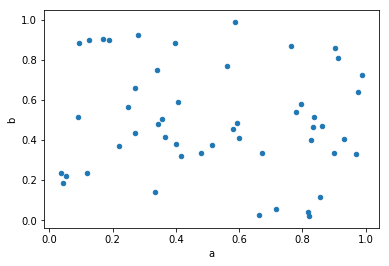

None

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("aula5/Online Retail.xlsx")

df = df[ ( df["Quantity"] > 0 ) & ( df["UnitPrice"] > 0 ) ]

df_random = pd.DataFrame(np.random.rand(50,4), columns=['a','b','c','d'])
df_random.plot.scatter(x='a', y='b')
display(plt.show())

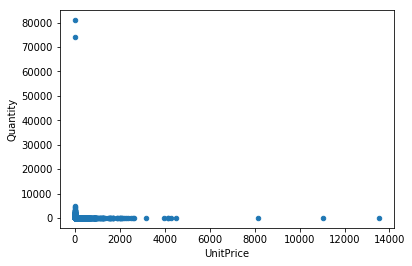

In [59]:
df.plot.scatter(x='UnitPrice', y='Quantity')
plt.show()

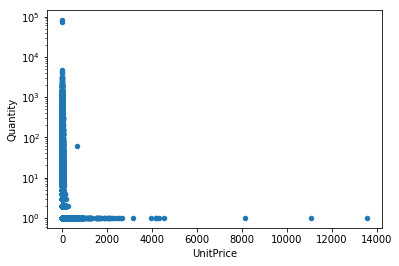

In [60]:
df.plot.scatter(x='UnitPrice', y='Quantity')
plt.xscale('linear')
plt.yscale('log')
plt.show()

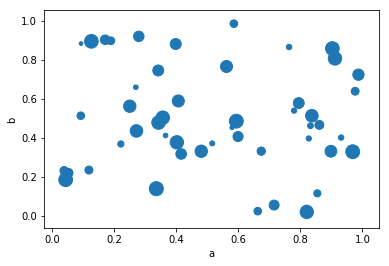

In [61]:
df_random.plot.scatter(x='a', y='b', s=df_random['c']*200)
plt.show()

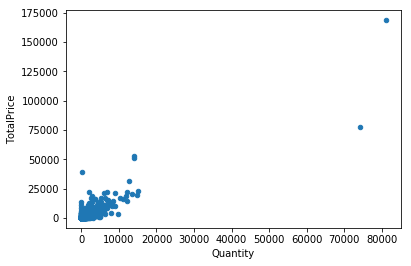

In [62]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df_group_invoice = df.groupby('InvoiceNo')
df_group_invoice_sum = df_group_invoice.sum()
df_group_invoice_sum.plot.scatter(x='Quantity', y='TotalPrice')
plt.show()

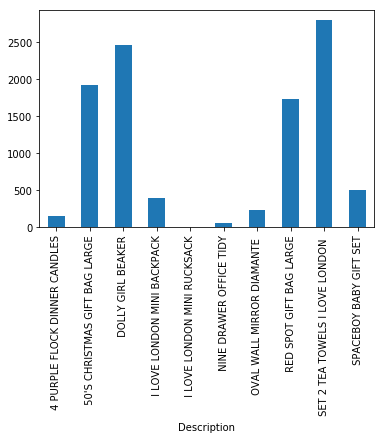

In [63]:
df.groupby('Description').sum().iloc[0:10]['Quantity'].plot(kind='bar')
plt.show()

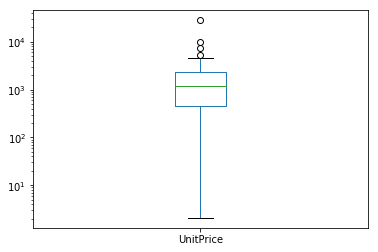

In [64]:
df.groupby('Description').sum().sort_values(by="Quantity", axis=0, ascending=False).iloc[0:100]['UnitPrice'].plot.box()
plt.yscale('log')
plt.show()

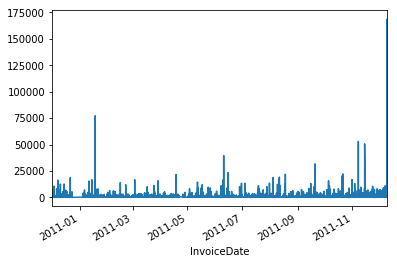

In [65]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.groupby('InvoiceDate').sum()['TotalPrice'].plot()
plt.show()

Regras de associação
===
---
### Definições
#### Transações
- Operação que gera registro de dados

#### Item
- Elemento que pode participar de uma transação

#### Itemset
- Coleção de um ou mais itens

---
### Regra
Implicação da forma "X -> Y", em que "X" e "Y" são itemset e "intersecção(X,Y) = {}" e "->" indica co-ocorrência
#### Frequência ou Support Count
- Frequência de ocorrência de um Itemset

#### Suporte do Itemset [freq(A U B) / |T|]
- Fração de transações que contem um Itemset
- Conjunto frequente é aquele cujo suporte é >= a um limiar definido
- Qual a probabilidade de uma transação conter o itemset A e o itemset B simultaneamente?

#### Confiança [freq(A U B) / freq(A)]
- Dentre as transações que contem X, a frequência que também contem Y
- Entre as transações que contêm o itemset A, quantas também contêm o itemset B?

#### Lift/Levantamento [freq(A U B) / freq(A)) / (freq(B) / |T|)]
**Atenção! Uma confiança alta não é suficiente para indicar grande associação. Deve-se considerar o suporte.** 
- O quanto a transação conter A aumenta/diminui a probabilidade dela conter B também?
- Associação negativa para valores < 1

---
### Algoritmo força bruta
Considerar todos os possíveis itemsets candidatos. Sua complexidade é O(NMw), tal que:
- N é candidatos
- M é transações
- NM é comparações
É uma boa ideia, além de usar estrutura de dados eficientes, é tentar reduzir as comparações com base na eliminação de associações entre candidatos e transações.

---
### Algoritmo Apriori
Se um itemset é frequente, os seus subconjuntos devem ser frequentes. Tornando irrelevante considerar seus subconjuntos.


In [56]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from scipy.stats import normaltest
df = pd.read_excel("aula7/OnlineRetail.xlsx")

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
display(df)


cesta_franca = (df[df['Country'] == "France"]
                .groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
                .unstack().reset_index().fillna(0).set_index('InvoiceNo'))
cesta_franca = cesta_franca.applymap(lambda x: int(x>=1))
cesta_franca.drop('POSTAGE', inplace=True, axis=1)
display(cesta_franca)


frequent_itemsets = apriori(cesta_franca,min_support=0.02,use_colnames=True)
display(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

display(rules.sort_values(by='support',ascending=False).head(1))

display(rules.sort_values(by='confidence',ascending=False).head(1))

display(rules.sort_values(by='lift',ascending=False).head(1))

display(rules[rules['support']>=0.02][rules['confidence']>=0.8].count().mean())


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
8         536366     22632            HAND WARMER RED POLKA DOT         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10        536367     22745            POPPY'S PLAYHOUSE BEDROOM         6   
11        536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12        536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13        536367     22310               IVORY KNITTED MUG COSY         6   
14        536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15        536367     22623         BOX OF VINTAGE JIGSAW BLOCKS         3   
16        536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17        536367     21754             HOME BUILDING BLOCK WORD         3   
18        536367     21755             LOVE BUILDING BLOCK WORD         3   
19        536367     21777          RECIPE BOX WITH METAL HEART         4   
20        536367     48187                  DOORMAT NEW ENGLAND         4   
21        536368     22960             JAM MAKING SET WITH JARS         6   
22        536368     22913          RED COAT RACK PARIS FASHION         3   
23        536368     22912       YELLOW COAT RACK PARIS FASHION         3   
24        536368     22914         BLUE COAT RACK PARIS FASHION         3   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
26        536370     22728            ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727             ALARM CLOCK BAKELIKE RED        24   
28        536370     22726           ALARM CLOCK BAKELIKE GREEN        12   
29        536370     21724      PANDA AND BUNNIES STICKER SHEET        12   
...          ...       ...                                  ...       ...   
541879    581585     22726           ALARM CLOCK BAKELIKE GREEN         8   
541880    581585     22727             ALARM CLOCK BAKELIKE RED         4   
541881    581585     16016          LARGE CHINESE STYLE SCISSOR        10   
541882    581585     21916      SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692          BOX OF 24 COCKTAIL PARASOLS        25   
541884    581585     84946         ANTIQUE SILVER T-LIGHT GLASS        12   
541885    581585     21684      SMALL MEDINA STAMPED METAL BOWL        12   
541886    581585     22398           MAGNETS PACK OF 4 SWALLOWS        12   
541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
541888    581585     23145       ZINC T-LIGHT HOLDER STAR LARGE        12   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   
541894    581587     22631              CIRCUS PARADE LUNCH BOX        12   
541895    581587     22556        PLASTERS IN TIN CIRCUS PARADE        12   
541896    581587     22555            PLASTERS IN TIN STRONGMAN        12   
541897    581587     22728            ALARM CLOCK BAKELIKE PINK         4   
541898    581587     22727             ALARM CLOCK BAKELIKE RED         4   
541

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   
537468                            1                           0   
537693                            0                           0   
537897                            0                           0   
537967                            0                           0   
538008                            0                           0   
538093                            0                           0   
538196                            0                           0   
539050                            0                           0   
539113                            0                           0   
539407                            0                           0   
539435                            0                           0   
539551                            0                           0   
539607                            0                           0   
539688                            0                           0   
539727                            0                           0   
539829                            0                           0   
540178                            0                           0   
540239                            0                           0   
540351                            0                           0   
540365                            1                           0   
540455                            0                           0   
540463                            0                           0   
540521                            0                           0   
540642                            0                           0   
540688                            0                           0   
...                             ...                         ...   
C565615                           0                           0   
C566960                           0                           0   
C567091                           0                           0   
C567916                           0                           0   
C568244                           0                           0   
C568534                           0                           0   
C568557                           0                           0   
C569981                           0                           0   
C570291                           0                           0   
C570515                           0                           0   
C571127                           0                           0   
C571473                           0                           0   
C571678                           0                           0   
C571680                           0                           0   
C573079                           0                           0   
C573869                           0                           0   
C574095                           0                           0   
C574261                           0                           0   
C574512                           0                           0   
C574946                           0                           0   
C576908                           0                           0   
C578377                           0                           0   
C578743                           0                           0   
C579127                           0                           0   
C579192                           0                           0   
C579532                           0                           0   
C579562                           0            

support                                           itemsets
0       0.03                           (10 COLOUR SPACEBOY PEN)
1       0.03               (3 PIECE SPACEBOY COOKIE CUTTER SET)
2       0.04                    (36 PENCILS TUBE RED RETROSPOT)
3       0.06                      (4 TRADITIONAL SPINNING TOPS)
4       0.02                    (6 GIFT TAGS VINTAGE CHRISTMAS)
5       0.02                   (ALARM CLOCK BAKELIKE CHOCOLATE)
6       0.08                       (ALARM CLOCK BAKELIKE GREEN)
7       0.03                       (ALARM CLOCK BAKELIKE IVORY)
8       0.04                      (ALARM CLOCK BAKELIKE ORANGE)
9       0.09                        (ALARM CLOCK BAKELIKE PINK)
10      0.08                         (ALARM CLOCK BAKELIKE RED)
11      0.04                    (ASSORTED COLOUR BIRD ORNAMENT)
12      0.06                       (ASSORTED COLOUR MINI CASES)
13      0.07                     (BAKING SET 9 PIECE RETROSPOT)
14      0.03                       (BAKING SET SPACEBOY DESIGN)
15      0.02                      (BIG DOUGHNUT FRIDGE MAGNETS)
16      0.03                     (BLACK/BLUE POLKADOT UMBRELLA)
17      0.04                            (BLUE HARMONICA IN BOX)
18      0.03                                (BLUE POLKADOT CUP)
19      0.02                      (BOX OF 6 MINI 50'S CRACKERS)
20      0.02                   (BOX OF 6 MINI VINTAGE CRACKERS)
21      0.03              (BUNDLE OF 3 ALPHABET EXERCISE BOOKS)
22      0.03                   (CAKE STAND WHITE TWO TIER LACE)
23      0.03                                  (CARD DOLLY GIRL)
24      0.06                      (CHARLOTTE BAG APPLES DESIGN)
25      0.06                  (CHARLOTTE BAG DOLLY GIRL DESIGN)
26      0.05                      (CHARLOTTE BAG PINK POLKADOT)
27      0.04                        (CHARLOTTE BAG SUKI DESIGN)
28      0.04                      (CHILDREN'S APRON DOLLY GIRL)
29      0.03                     (CHILDREN'S CIRCUS PARADE MUG)
..       ...                                                ...
775     0.02  (SPACEBOY LUNCH BOX, LUNCH BAG DOLLY GIRL DESI...
776     0.02  (PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...
777     0.02  (PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...
778     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
779     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6...
780     0.03  (SET/6 RED SPOTTY PAPER CUPS, PACK OF 20 SKULL...
781     0.03  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...
782     0.02  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
783     0.02  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
784     0.03  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...
785     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
786     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
787     0.03  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...
788     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
789     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
790     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
791     0.03  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...
792     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
793     0.02  (SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...
794     0.03  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
795     0.02  (SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 7...
796     0.02  (PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...
797     0.03  (PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...
798     0.02  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...
799     0.02  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...
800     0.03  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...
801     0.02  (PACK OF 20 SKULL PAPER NAPKINS, SET/20 RED RE...
802     0.03  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...
803     0.03  (PACK OF 6 SKULL PAPER PLATES, SET/20 RED RETR...
804     0.02  (PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKU...

[805 rows x 2 columns]

antecedents                    consequents  \
770  (SET/6 RED SPOTTY PAPER PLATES)  (SET/6 RED SPOTTY PAPER CUPS)   

     antecedent support  consequent support  support  confidence  lift  \
770                0.11                0.12     0.10        0.96  8.20   

     leverage  conviction  
770      0.09       22.07

antecedents  \
1923  (DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...   

                      consequents  antecedent support  consequent support  \
1923  (DOLLY GIRL CHILDRENS BOWL)                0.02                0.04   

      support  confidence  lift  leverage  conviction  
1923     0.02        1.00 25.61      0.02         inf

antecedents  \
1928  (DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...   

                                            consequents  antecedent support  \
1928  (DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...                0.03   

      consequent support  support  confidence  lift  leverage  conviction  
1928                0.02     0.02        0.85 35.46      0.02        6.34

501.0